### 📚 Import Required Libraries

In [ ]:
# 📚 Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 🔧 Scikit-learn modules for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


### 📥 Step 1: Load the dataset

In [ ]:

df = pd.read_csv("drug.csv")  # Make sure 'drug.csv' is in your working directory
df                           # Displays the DataFrame (useful in Jupyter Notebook)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


### 🧩 Step 2: Encode Categorical Features Using LabelEncoder


In [69]:
# 🔤 Initialize LabelEncoder
le = LabelEncoder()

# 🔁 Loop through each categorical column and apply Label Encoding
for col in ['Sex', 'BP', 'Cholesterol', 'Drug']:
    df[col] = le.fit_transform(df[col])

### ✂️ Step 3: Separate Features and Target Variable
### 🎯 Define X as input features and y as the target label (Drug)

In [ ]:
# 🎯 Input features (all columns except 'Drug')
X = df.drop("Drug", axis=1)

# 🎯 Target variable (what we want to predict)
y = df["Drug"]

### 🧪 Step 4: Split the Dataset into Training and Testing Sets
##### 📚 80% data for training the model, 20% for testing performance

In [70]:
# 🧪 Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,              # Features and target
    test_size=0.2,     # 20% data for testing
    random_state=42    # For reproducibility
)

### 🌲 Step 5: Train the Decision Tree Classifier
##### 🏗️ Fit the model on the training data and make predictions on test data

In [71]:
# 🌳 Initialize the Decision Tree Classifier
Dt = DecisionTreeClassifier()

# 🏋️ Train the model on training data
Dt.fit(X_train, y_train)

# 🔮 Predict the target values for the test set
y_pred = Dt.predict(X_test)


### 📊 Step 6: Evaluate the Model Performance
#### 🧾 Print Accuracy, Confusion Matrix, and Detailed Classification Report

In [74]:

# 📋 Print classification report: precision, recall, f1-score
print("Classification Report:")
print(classification_report(y_test, y_pred))

# 🔍 Print confusion matrix: shows actual vs predicted class breakdown
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# ✅ Print overall accuracy of the model
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))



Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00        15

    accuracy                           1.00        40
   macro avg       1.00      1.00      1.00        40
weighted avg       1.00      1.00      1.00        40

Confusion Matrix:
[[ 6  0  0  0  0]
 [ 0  3  0  0  0]
 [ 0  0  5  0  0]
 [ 0  0  0 11  0]
 [ 0  0  0  0 15]]
Accuracy Score:
1.0


### 📊 Step 7: Visualize the Confusion Matrix



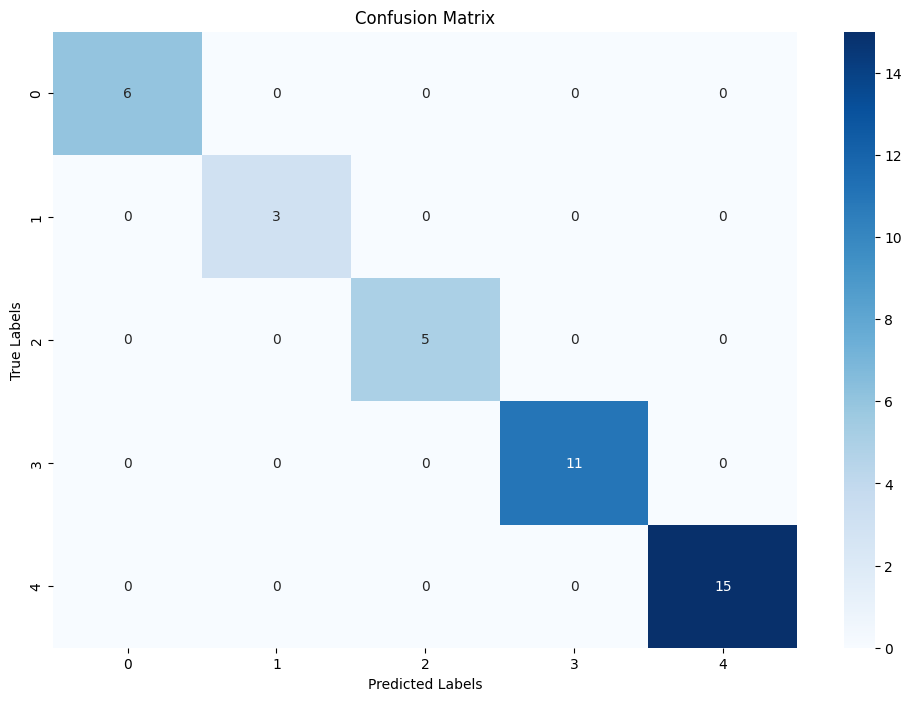

In [75]:
# ✅ Create a proper-sized figure
plt.figure(figsize=(12, 8))

# 🔄 Plot confusion matrix heatmap (correct label order: y_test, y_pred)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')

# 🏷️ Add titles and axis labels
plt.title("Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")

# 👁️ Show the plot
plt.show()